In [57]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np


pd.set_option('display.max_columns', None)

import warnings

warnings.filterwarnings("ignore")

In [9]:
basepath = "../data/"
# Load county level suitability data
suitability_county = pd.read_csv(basepath + "suitability_scores/suitability_scores_county.csv", dtype={"GEOID": str})

# Load block group data
suitability_block_group = pd.read_csv(basepath + "suitability_scores/suitability_scores_bg.csv", dtype={"GEOID": str})

# Load Project suitability data
project_suitability = pd.read_csv(basepath + "suitability_scores/suitability_scores_project.csv", dtype={"GEOID": str}).drop(columns=["STATEFP", "COUNTYFP", "TRACTCE", "BLKGRPCE"])
factors = ['GHI', 'Protected_Land', 'Habitat', 'Slope', 'Population_Density', 'Distance_to_Substation', 'Land_Cover']

In [3]:
suitability_county.describe()

,GHI,Protected_Land,Habitat,Slope,Population_Density,Distance_to_Substation,Land_Cover
count,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000,3108.000000
mean,18.099953,89.867916,57.412366,69.670574,88.415701,57.128374,71.160343
std,16.830075,13.825292,20.138014,30.013374,19.375774,9.260930,13.510064
min,4.765299,2.379858,15.361651,0.138137,10.000000,50.000000,27.518503
25%,5.704354,87.427888,39.838991,48.522618,87.899914,50.000000,59.778988
50%,15.000000,95.793106,55.600204,80.618548,96.892474,53.254134,69.210078
75%,20.000000,98.547080,74.578664,95.716219,99.196322,61.070631,83.872861
max,90.000000,100.000000,99.567568,100.000000,100.000000,94.799483,99.270948


In [4]:
suitability_block_group.describe()

,GHI,Protected_Land,Habitat,Slope,Population_Density,Distance_to_Substation,Land_Cover,TRACTCE,BLKGRPCE
count,237770.000000,237804.000000,237804.000000,237792.000000,237786.000000,237804.000000,237792.000000,237804.000000,237804.000000
mean,21.747509,94.708899,73.291660,82.735631,27.238352,73.078445,71.379701,254500.405910,2.125444
std,23.774010,13.040835,26.459468,25.915605,31.641067,17.013869,9.247064,347586.307108,1.109086
min,3.763716,0.000000,5.000000,0.000000,10.000000,50.000000,1.000000,100.000000,0.000000
25%,5.000000,97.500000,47.272727,75.559432,10.000000,50.000000,67.992490,10367.000000,1.000000
50%,15.000000,100.000000,82.842183,96.500000,10.000000,75.000000,75.000000,42601.000000,2.000000
75%,20.000000,100.000000,98.095238,100.000000,23.656716,90.000000,75.000000,452000.000000,3.000000
max,90.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,991703.000000,9.000000


In [5]:
project_suitability.describe()

,GHI,Protected_Land,Habitat,Slope,Population_Density,Distance_to_Substation,Land_Cover,Wattage
count,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000,4140.000000
mean,26.617995,91.404584,56.852154,81.429263,66.118968,67.712012,71.933863,13.315990
std,30.097977,10.942445,18.511924,20.715437,30.324749,13.728775,11.906616,36.065576
min,5.000000,26.827272,5.000000,5.533967,10.000000,50.000000,36.011814,0.300000
25%,5.000000,89.015293,40.333791,69.321071,39.747696,52.757083,62.773331,1.600000
50%,15.000000,95.123272,55.067886,89.492648,75.592099,68.682482,69.907433,3.000000
75%,20.000000,98.730026,70.816464,98.150696,93.882585,80.210641,83.141726,5.200000
max,90.000000,100.000000,99.749044,100.000000,100.000000,92.565435,99.736300,585.900000


# Histograms of factors

ValueError: array must not contain infs or NaNs

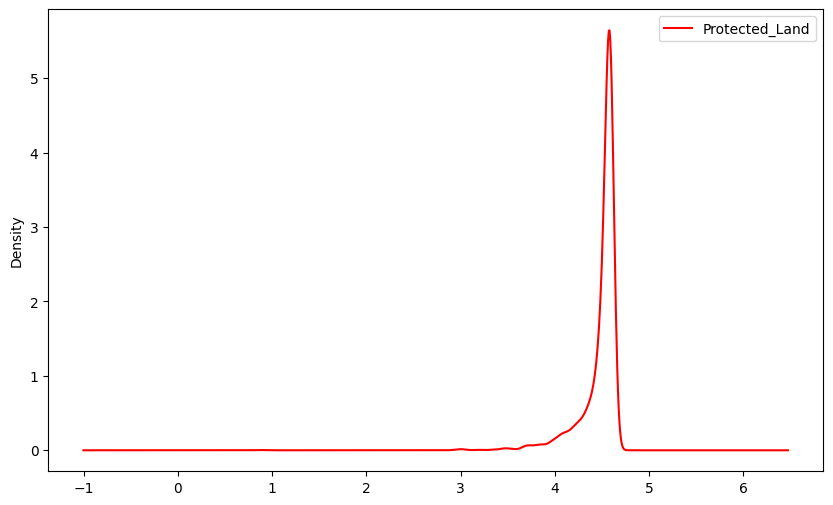

In [59]:
county_ghi = suitability_county[['Protected_Land']]
bg_ghi = suitability_block_group[['Protected_Land']]
project_ghi = project_suitability[['Protected_Land']]


fig, ax = plt.subplots(figsize=(10, 6))

# draw kde plot
county_ghi.plot(kind='kde', ax=ax, label='KDE', color='red')

# draw kde plot
bg_ghi.plot(kind='kde', ax=ax,  label='KDE BG', color='green')

# draw kde plot
project_ghi.plot(kind='kde', ax=ax,  label='KDE Project', color='blue')

plt.xlabel('Protected_Land')
plt.ylabel('Density')
plt.title('GHI Distribution')
plt.legend(['County', 'Block Group', 'Project'])

plt.show()

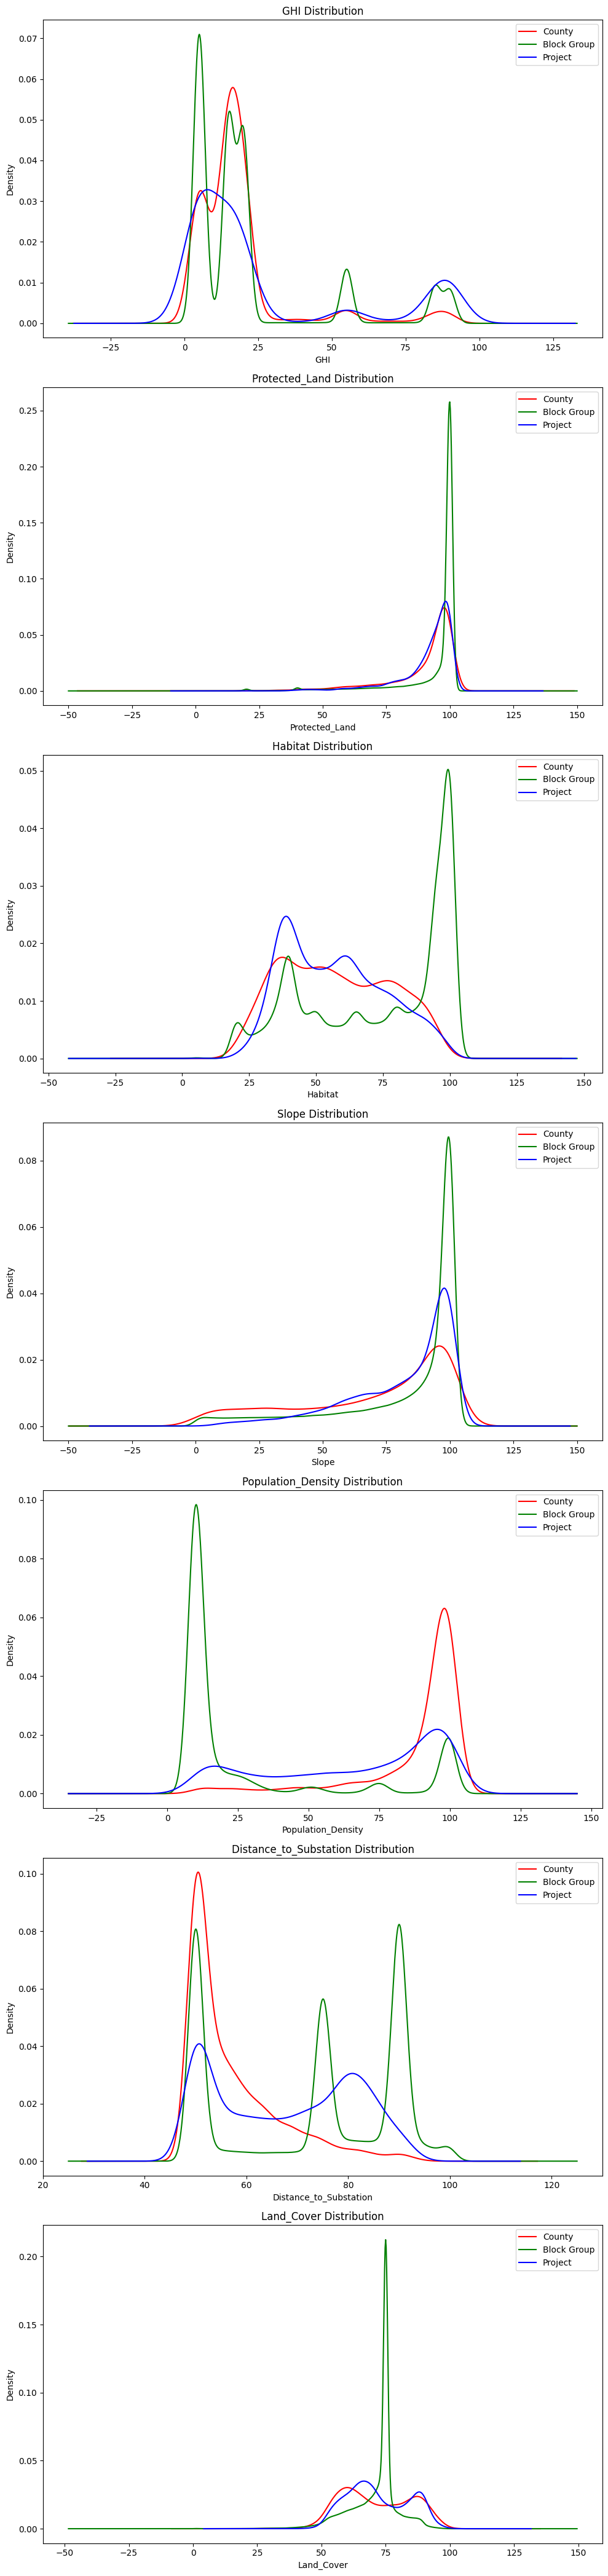

In [60]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(factors), figsize=(10, 6 * len(factors)))

# Ensure axes is iterable even for a single factor
if len(factors) == 1:
    axes = [axes]

for ax, factor in zip(axes, factors):
    county_factor = suitability_county[[factor]]
    bg_factor = suitability_block_group[[factor]]
    project_factor = project_suitability[[factor]]

    # Plot KDE
    county_factor.plot(kind='kde', ax=ax, label='County', color='red')
    bg_factor.plot(kind='kde', ax=ax, label='Block Group', color='green')
    project_factor.plot(kind='kde', ax=ax, label='Project', color='blue')

    ax.set_xlabel(factor)
    ax.set_ylabel('Density')
    ax.set_title(f'{factor} Distribution')
    ax.legend(['County', 'Block Group', 'Project'])

plt.tight_layout()
plt.show()
